<a href="https://colab.research.google.com/github/alirezaghanbari666/Machinlearning-with-python-andpytorch/blob/main/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.12.1+cu113'

#1. Create a straight line dataset using the linear regression formula (weight * X + bias).


Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
Split the data into 80% training, 20% testing.


Plot the training and testing data so it becomes visual.
Your output of the below cell should look something like:

In [3]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
#Creat * know *paramters
weight = 0.15
bias = 0.5
#Creat data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step)
y = weight * X +bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:15]}\ny: {y[:15]}")

Number of X samples: 50
Number of y samples: 50
First 10 X & y samples:
X: tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800])
y: tensor([0.5000, 0.5030, 0.5060, 0.5090, 0.5120, 0.5150, 0.5180, 0.5210, 0.5240,
        0.5270, 0.5300, 0.5330, 0.5360, 0.5390, 0.5420])


In [6]:
#Creat train/ test split
train_split = int(0.8 * len(X)) #80% of data use training set, 20%testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]



len(X_train),len(y_train),len(X_test), len(y_test)

(40, 40, 10, 10)

Beautiful! Now we're going to move towards building a model that can learn the relationship between X (features) and y (labels).

Split data into training and test sets We've got some data.

But before we build a model we need to split it up.

One of most important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each split of the dataset serves a specific purpose

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our X and y tensors.

Note: When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.

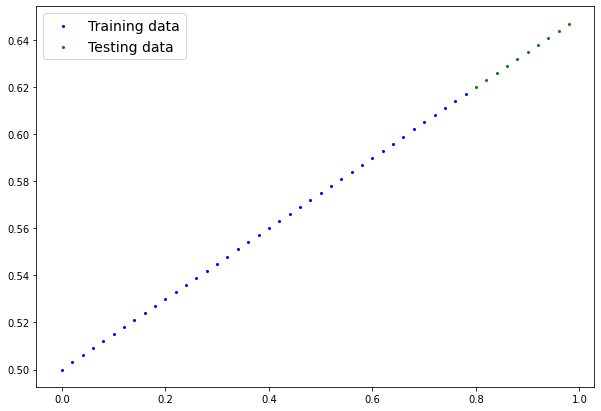

In [7]:

# Plot the training and testing data 
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

plot_predictions();


#2. Build a PyTorch model by subclassing nn.Module.



Inside should be a randomly initialized **nn.Parameter()** with **requires_grad=True**, one for weights and one for bias.
Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
Once you've constructed the model, make an instance of it and check its **state_dict().**
**Note:** If you'd like to use nn.Linear() instead of **nn.Parameter()** you can.

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(data=torch.randn(1, 
                                              requires_grad=True,
                                              dtype=torch.float
                                              ))
    
    self.bias = nn.Parameter(data=torch.randn(1, 
                                              requires_grad=True,
                                              dtype=torch.float
                                              ))

  def forward(self, x):
    return self.weight * x + self.bias

In [ ]:
# Instantiate the model
model = LinearRegressionModel().to(device)
model

In [ ]:
#Creat the loss functions
loss_fn = nn.L1Loss()
#MAE loss iss same as L1 loss
# Creat  the optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
                     

#3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.**SGD(params, lr)** respectively.


* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in


* Write a training loop to perform the appropriate training steps for 300 epochs.


* The training loop should test the model on the test dataset every 20 epochs.

In [ ]:
# Training loop
torch.manual_seed(42)

# Train model for 300 epochs
epochs = 400

# Send data to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Model in train mode
  model.train()

  # 1. Forward pass
  y_preds = model(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_preds, y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context 
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model(X_test)
      # 2. Calculate loss
      test_loss = loss_fn(test_pred, y_test)

      # Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss}")

#4. Make predictions with the trained model on the test data.




* Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot)

In [ ]:
model.eval()
with torch.inference_mode():
    y_preds =model(X_test)
y_preds[:15]

In [ ]:
#plot the predictins
plot_predictions(predictions=y_preds.cpu())

#5. Save your trained model's state_dict() to file.


* Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.


* Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.



In [ ]:
from pathlib import Path
# 1. Create models directory 

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
#2.MODEL_NAME
MODEL_NAME = "01_pytorch_workflow_exercises"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"saving model to :{MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
# Create new instance of model and load saved state dict (make sure to put)
loaded_model= LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.to(device)

In [ ]:
# Make predictions with loaded model and compare them to the previous
loaded_model.eval()
with torch.inference_mode():
    loaded_preds =loaded_model(X_test)
y_preds == loaded_preds